# Handwritten Digits Recognizer Using Two (2) - Layer Neural Network

In this notebook, I built a basic two-layer neural network from scratch. I trained it on the MNIST handwritten digits dataset. The main goal was to understand the math behind neural networks:

- Forward and backward propagation
- Activations
- Loss functions
- Gradient updates

# Importing Libraries

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Loading Train Data

In [52]:
train = pd.read_csv("train.csv")


# Loading Test Data

In [53]:
test = pd.read_csv("test.csv")



# Data Visualization

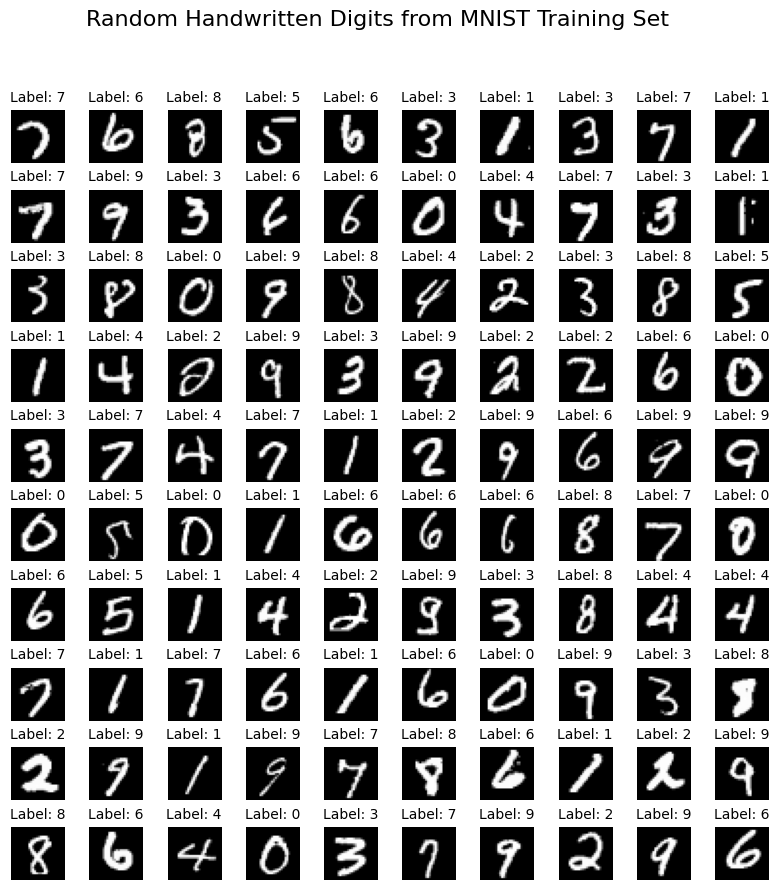

In [55]:
# Visualize 10x10 random digits from the training set
rows = 10
cols = 10
fig = plt.figure(figsize=(10, 10))  

# Randomly select 100 examples
indexes = np.random.choice(len(train), rows * cols, replace=False)

count = 0
for i in range(rows):
    for j in range(cols):
        idx = indexes[count]
        ax = fig.add_subplot(rows, cols, count + 1)
        
        # Extract the pixel values and reshape to 28x28
        pixels = train.iloc[idx, 1:].values 
        pixels = pixels.reshape(28, 28)
        
        ax.imshow(pixels, cmap='gray')
        ax.set_title(f"Label: {train.iloc[idx, 0]}", fontsize=10)
        ax.axis('off')
        
        count += 1

plt.subplots_adjust(wspace=0.1, hspace=0.5)  
plt.suptitle("Random Handwritten Digits from MNIST Training Set", fontsize=16)
plt.show()

# Checking First and last Five Rows of Train set

In [56]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
train.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Test set has no labels

In [58]:
train.shape

(42000, 785)

In the Table:

Row = number of examples (samples / images) (m)

Column = number of features (n)

Covert Data To Numpy Array & Shuffle it

In [59]:
data = train.to_numpy()



In [60]:
m = data.shape[0]


# Split data into Val set and Train set and Transpose

In [61]:
indices = np.random.permutation(m)

X = data[indices, 1:]  # (m, 784)
y = data[indices, 0]   # (m,)

In [62]:
n_dev = 1000 

X_dev   = X[:n_dev]
y_dev   = y[:n_dev]
X_train = X[n_dev:]
y_train = y[n_dev:]


# Normalize Data

In [63]:
# Normalize pixels to [0, 1]
X_train = X_train / 255.0
X_dev   = X_dev   / 255.0

# For test set later
X_test = test.to_numpy() / 255.0


# Shape of X & Y

In [64]:
print("X.shape:", X.shape)   
print("y.shape:", y.shape)   
print("X_dev.shape:", X_dev.shape)     
print("y_dev.shape:", y_dev.shape)    
print("X_train.shape:", X_train.shape) 
print("X_test.shape:", X_test.shape) 

X.shape: (42000, 784)
y.shape: (42000,)
X_dev.shape: (1000, 784)
y_dev.shape: (1000,)
X_train.shape: (41000, 784)
X_test.shape: (28000, 784)


# One Hot Econding

- Since the shape of y is (m,), one hot encoidng is needed 
- to comvert (m,) to (n_ouput,m)

In [65]:
def one_hot(Y, num_classes=10):
    
    one_hot_Y = np.zeros((Y.size, num_classes))
    
    one_hot_Y[np.arange(Y.size), Y] = 1
    
    return one_hot_Y.T # (10,m)


# Intitialize Parameters

In [66]:
def init_param(n_input = 784, n_hidden = 128, n_output = 10):
    """
    Initialize weights and biases for a 2-layer neural network.
    
    Args:
        n_input: number of input features
        n_hidden: number of neurons in hidden layer
        n_output: number of output neurons/classes
    
    Returns:
        W1, b1, W2, b2: initialized parameters
    """
    # Input → Hidden
    W1 = np.random.randn(n_hidden, n_input) * 0.1  
    b1 = np.zeros((n_hidden, 1))       
                
    # Hidden → Output
    W2 = np.random.randn(n_output, n_hidden) * 0.1
    b2 = np.zeros((n_output, 1))
    
    return W1, b1, W2, b2


# Activation 

- relu
- softmax

In [67]:
def relu(Z):
    """
    Z: numpy array of shape (n_hidden, m)
    Returns: A = relu(Z), same shape as Z
    """
    return np.maximum(0, Z)


def softmax(Z):
    """
    Z: numpy array of shape (n_output, m)
    Returns: softmax probabilities, same shape
    """
    Z_shift = Z - np.max(Z, axis=0, keepdims=True)
    
    expZ = np.exp(Z_shift)
    
    return expZ / np.sum(expZ, axis=0, keepdims=True)

# Forward Propagation

In [68]:
def forward_prop(W1, b1, W2, b2, X):
    """
    Forward propagation for a 2-layer neural network.
    
    Args:
        W1, b1: weights and biases for layer 1 (W1: (n_hidden, n_input))
        W2, b2: weights and biases for layer 2 (W2: (n_output, n_hidden))
        X: input data of shape (m, n_input)  ← examples in rows
    
    Returns:
        A2: output probabilities of shape (n_output, m)
        cache: dictionary with intermediates for backprop
    """
    
    # X shape: (m, 784) → transpose to (784, m) for matmul
    
    Z1 = W1 @ X.T + b1          # (hidden, m)
    
    A1 = relu(Z1)               # (hidden, m)
    
    Z2 = W2 @ A1 + b2           # (10, m)
    
    A2 = softmax(Z2)            # (10, m)
    
    cache = {"Z1": Z1, "A1": A1}

    
    return A2, cache

# Backpropagation

In [69]:
def back_prop(A2, cache, X, Y_oh, W2):

    m = X.shape[0]

    A1 = cache["A1"]
    Z1 = cache["Z1"]
    
    # Output layer: Softmax + Cross Entropy
    dZ2 = A2 - Y_oh
    dW2 = (1/m) * (dZ2 @ A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

    # Hidden layer: ReLu
    dA1 = W2.T @ dZ2
    dZ1 = dA1 * (Z1 > 0)

    dW1 = (1/m) * (dZ1 @ X)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }

    return grads


# Parameter updates

In [70]:
def param_update(model, grads, learning_rate):

    model["W1"] = model["W1"] -  learning_rate * grads["dW1"]
    model["b1"] = model["b1"] -  learning_rate * grads["db1"]
    model["W2"] = model["W2"] -  learning_rate * grads["dW2"]
    model["b2"] = model["b2"] -  learning_rate * grads["db2"]

    return model


# Prediction Function
- Foward pass with updated paramaters
- Take argmax of softmax output

In [71]:
def predict(model, X):
    
    W1, b1, W2, b2 = model["W1"], model["b1"], model["W2"], model["b2"]
    
    A2, _ = forward_prop(W1, b1, W2, b2, X)
    
    return np.argmax(A2, axis=0)

    
    
    
    

# Accuracy

In [72]:
def get_accuracy(preds, Y):
    return np.mean(preds == Y)

# Set Hyperparamaeters

In [73]:
learning_rate = 0.1
epochs = 100

# Gradient Descent Algorithm

In [74]:
def gradient_descent(X, Y, iterations=500, alpha=0.1, hidden_size=128):
    
    W1, b1, W2, b2 = init_param(n_hidden=hidden_size)
    
    model = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    
    Y_oh = one_hot(Y)
    
    for i in range(iterations):
        A2, cache = forward_prop(model["W1"], model["b1"], model["W2"], model["b2"], X)
        grads = back_prop(A2, cache, X, Y_oh, model["W2"])
        dW1, db1, dW2, db2 = grads
        grads_dict = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
        model = param_update(model, grads, learning_rate)
        
        if i % 50 == 0:
            preds = predict(model, X)
            acc = get_accuracy(preds, Y)
            print(f"Iteration {i}: Training Accuracy = {acc:.4f}")
    
    return model

# Model Training

In [75]:
# === TRAIN THE MODEL ===
print("Starting training...")

model = gradient_descent(
    X_train,
    y_train,
    iterations=500,     
    alpha=0.1,
    hidden_size=128      
)


Starting training...
Iteration 0: Training Accuracy = 0.1285
Iteration 50: Training Accuracy = 0.8311
Iteration 100: Training Accuracy = 0.8711
Iteration 150: Training Accuracy = 0.8869
Iteration 200: Training Accuracy = 0.8959
Iteration 250: Training Accuracy = 0.9029
Iteration 300: Training Accuracy = 0.9070
Iteration 350: Training Accuracy = 0.9107
Iteration 400: Training Accuracy = 0.9145
Iteration 450: Training Accuracy = 0.9173


# Evaluation

In [76]:
# === EVALUATION ===
# Training accuracy
train_preds = predict(model, X_train)
print(f"\nFinal Training Accuracy: {get_accuracy(train_preds, y_train):.4f}")

# Dev accuracy
dev_preds = predict(model, X_dev)
print(f"Development Accuracy: {get_accuracy(dev_preds, y_dev):.4f}")


Final Training Accuracy: 0.9201
Development Accuracy: 0.9200


In [77]:
np.random.seed(42)  # Change 42 to any number you want, or remove this line for truly random each time


In [78]:
def show_test_set_predictions(model, X_test=X_test, rows=8, cols=8):
    """
    Displays an 8x8 grid of random digits from the TEST set
    with only the model's predictions (no true labels available).
    """
    fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
    indices = np.random.choice(len(X_test), rows * cols, replace=False)
    
    for i in range(rows):
        for j in range(cols):
            idx = indices[i * cols + j]
            img = X_test[idx].reshape(28, 28)
            single_ex = X_test[idx].reshape(1, -1)  # (1, 784)
            pred = predict(model, single_ex)[0]
            
            ax = axes[i, j]
            ax.imshow(img, cmap='gray', interpolation='nearest')
            ax.set_title(f'Prediction: {pred}', fontsize=12, color='blue')
            ax.axis('off')
    
    plt.suptitle('Test Set Predictions (No True Labels Available)', fontsize=18, color='darkblue')
    plt.tight_layout()
    plt.show()
    
    


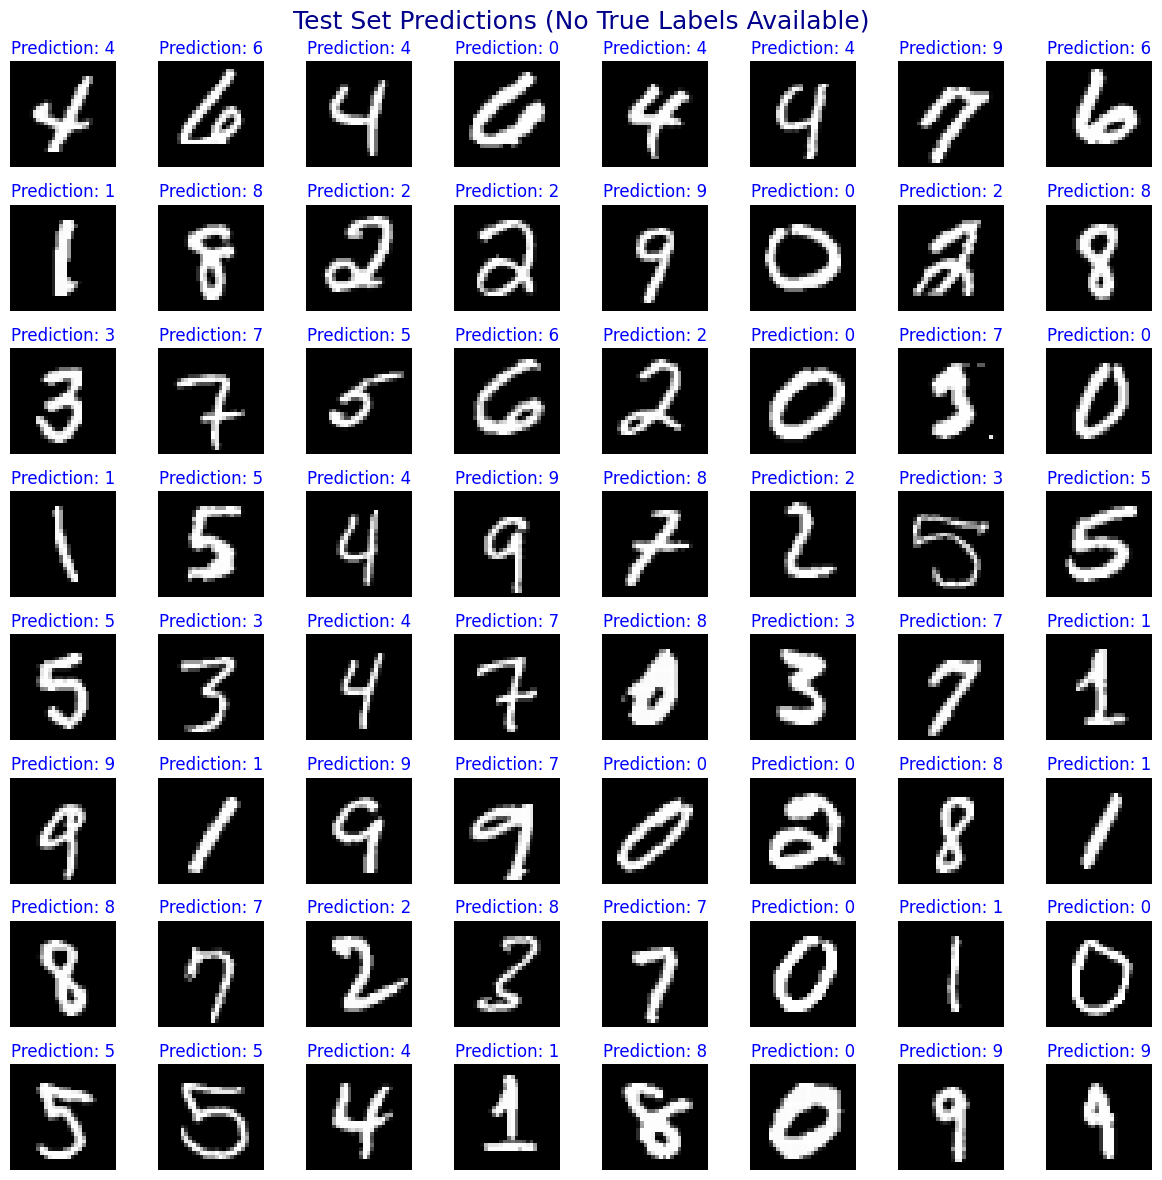

In [79]:
np.random.seed(42)  

# === USE IT AFTER TRAINING ===
show_test_set_predictions(model, rows=8, cols=8)